In [41]:
%load_ext autoreload
%autoreload 2

import os
import sys
import torch
import numpy as np

from memflow.dataset.data import ParquetData
#from memflow.Hinv.template_dataset import *
from memflow.dataset.template_dataset import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
data_hard = ParquetData(
    files = [
        #'/home/ucl/cp3/fbury/scratch/MEM_data/ttH/TF_v6/hard/2018/ttH/ttH_HToInvisible_M125.parquet',
        '/cephfs/dice/users/sa21722/datasets/MEM_data/ttH/TF_v6/hard/2018/ttH/ttH_HToInvisible_M125.parquet',
    ],
    lazy = True,
    N = int(1e5)
)
print(data_hard)

Data object
Loaded branches:
   ... file: 100000
   ... sample: 100000
   ... tree: 100000
Branch in files not loaded:
   ... Generator_scalePDF
   ... Generator_weight
   ... Generator_x1
   ... Generator_x2
   ... Generator_xpdf1
   ... Generator_xpdf2
   ... W_minus_from_antitop_eta
   ... W_minus_from_antitop_genPartIdxMother
   ... W_minus_from_antitop_idx
   ... W_minus_from_antitop_mass
   ... W_minus_from_antitop_pdgId
   ... W_minus_from_antitop_phi
   ... W_minus_from_antitop_pt
   ... W_minus_from_antitop_status
   ... W_minus_from_antitop_statusFlags
   ... W_plus_from_top_eta
   ... W_plus_from_top_genPartIdxMother
   ... W_plus_from_top_idx
   ... W_plus_from_top_mass
   ... W_plus_from_top_pdgId
   ... W_plus_from_top_phi
   ... W_plus_from_top_pt
   ... W_plus_from_top_status
   ... W_plus_from_top_statusFlags
   ... Z_from_higgs_eta
   ... Z_from_higgs_genPartIdxMother
   ... Z_from_higgs_idx
   ... Z_from_higgs_mass
   ... Z_from_higgs_pdgId
   ... Z_from_higgs_phi
  

In [43]:
hard_dataset = ttHHardDataset(
    data = data_hard,
    selection = [
        'higgs',
        'tops',
        'bottoms',
        'Ws',
        'Zs',
        'quarks',
        'neutrinos',
    ],
    build = False,
    fit = True,
    coordinates = 'cylindrical',
    apply_preprocessing = True,
    apply_boost = False,
    dtype = torch.float32,
)
print(hard_dataset)

Loading objects from /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_hard
Saving preprocessing to /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_hard
Will overwrite what is in output directory /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_hard/preprocessing
Preprocessing saved in /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_hard/preprocessing
Parton dataset with 39842 events
 Initial states pdgids : [21, 21]
 Final states pdgids   : [25, 6, -6]
 Final states masses   : [125.2, 172.57, 172.57]
Containing the following tensors
bottoms    : data ([39842, 2, 5]), mask ([39842, 2])
             Mask exist    : [100.00%, 100.00%]
             Mask attn     : [True, True]
             Weights       : 39842.00, 39842.00
             Features      : ['pt', 'eta', 'phi', 'mass', 'pdgId']
             Selected for batches : True
Zs         : data ([39842, 2, 5]), mask ([39842, 2])
             Mask exist    : [100.00%, 100.00%]
             Mask attn     : [T

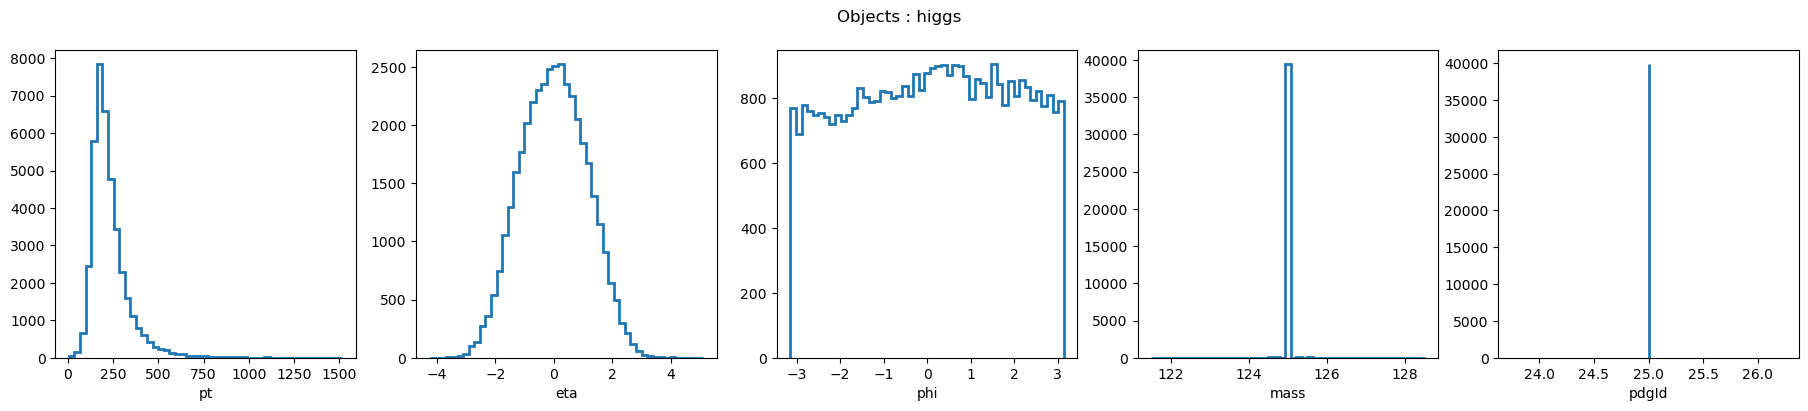

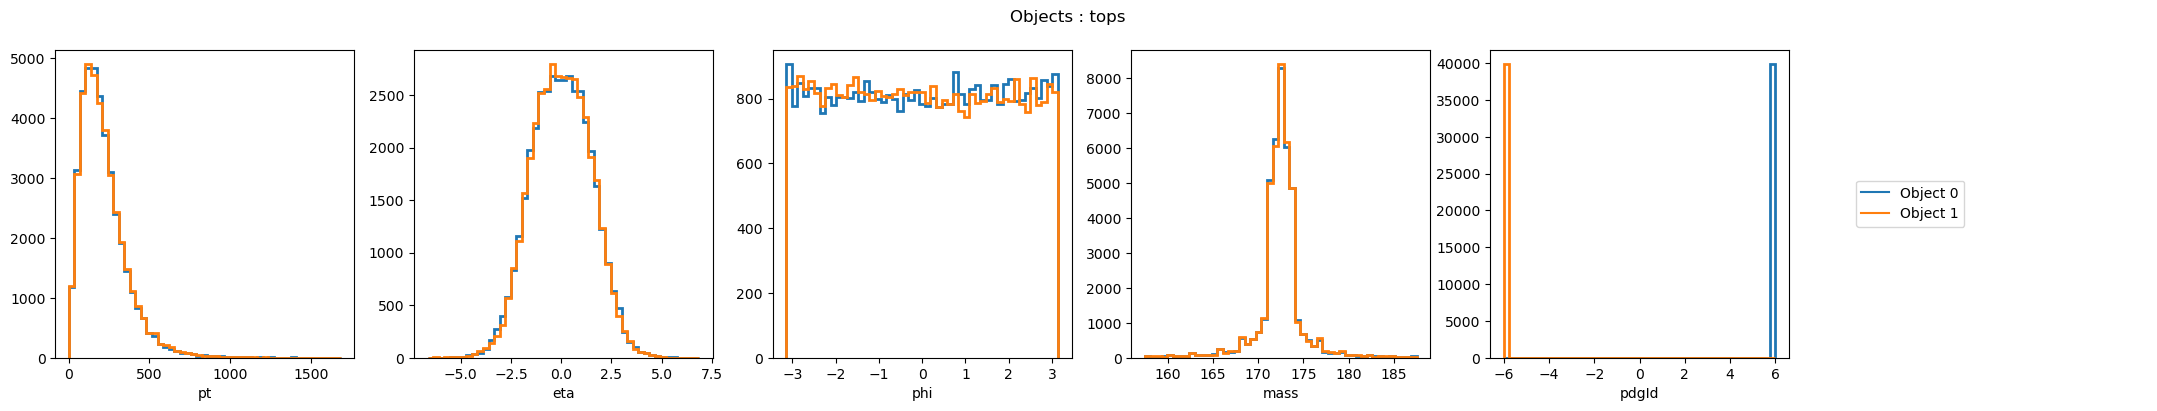

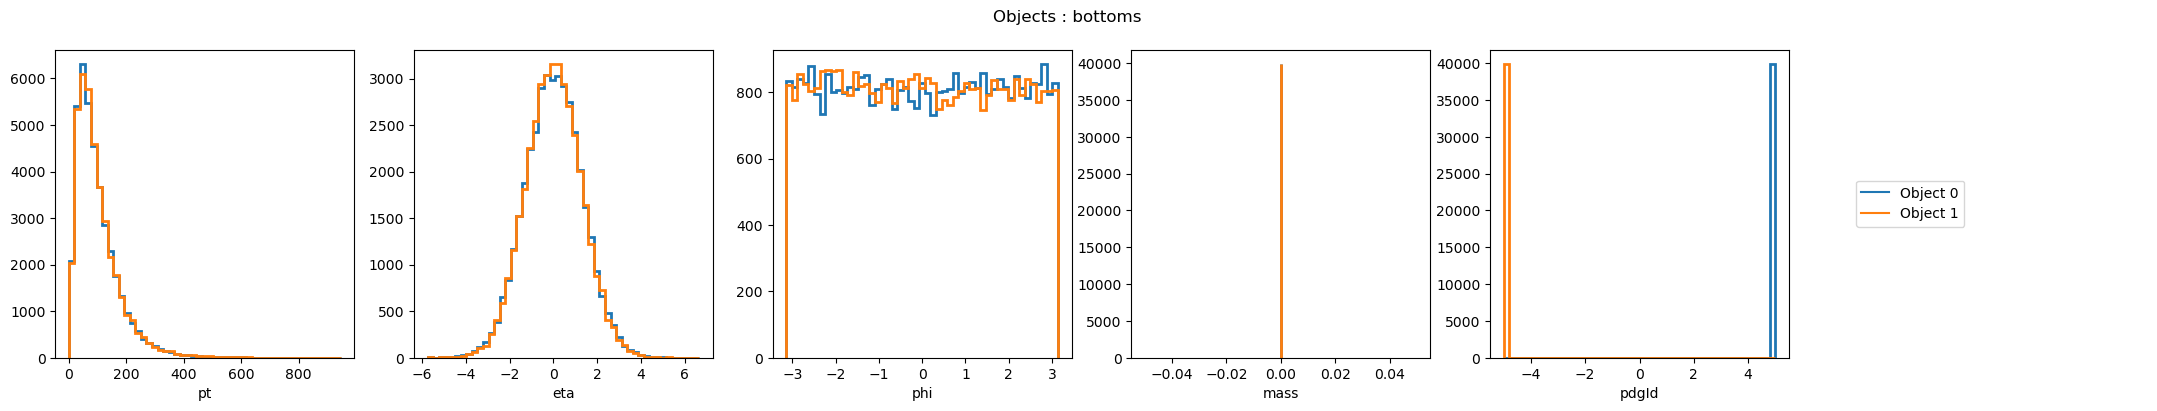

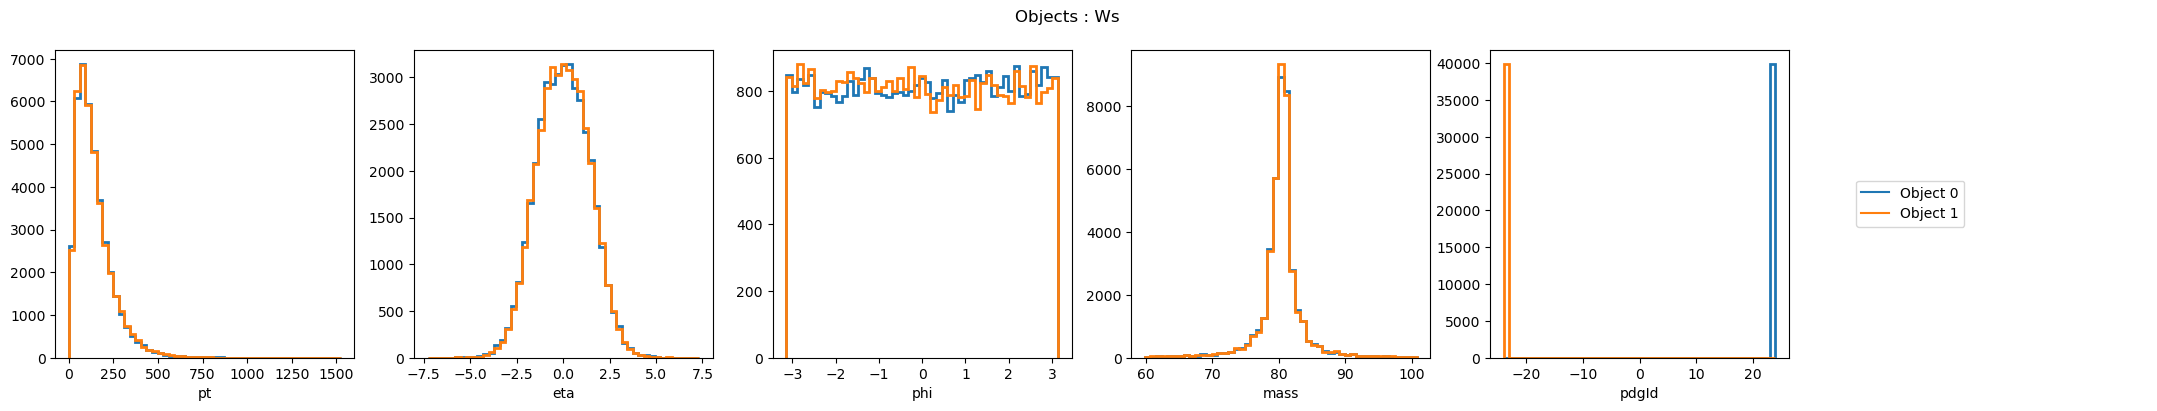

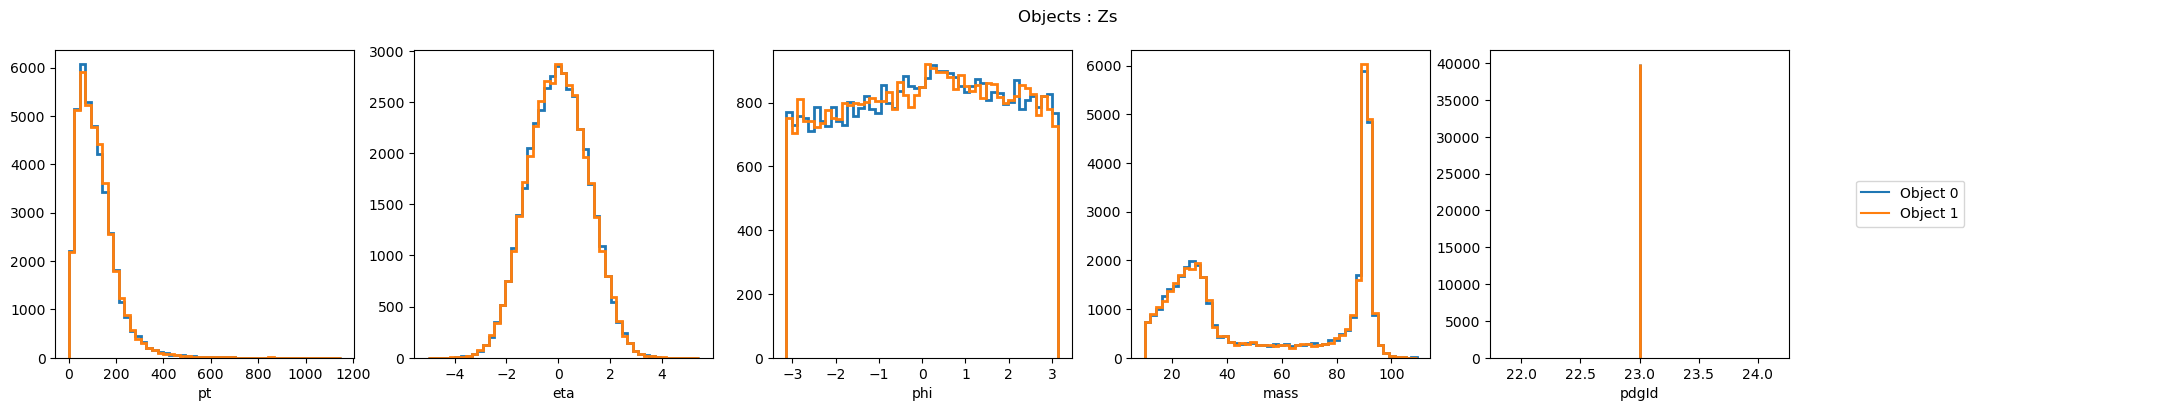

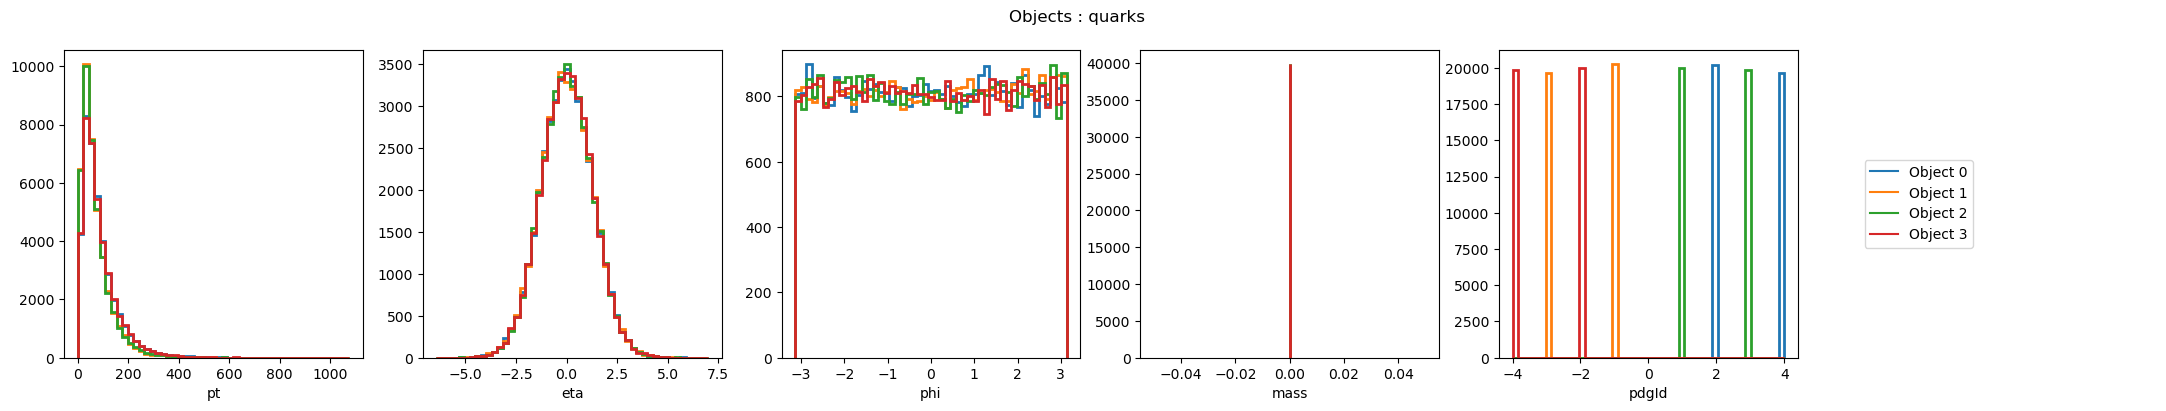

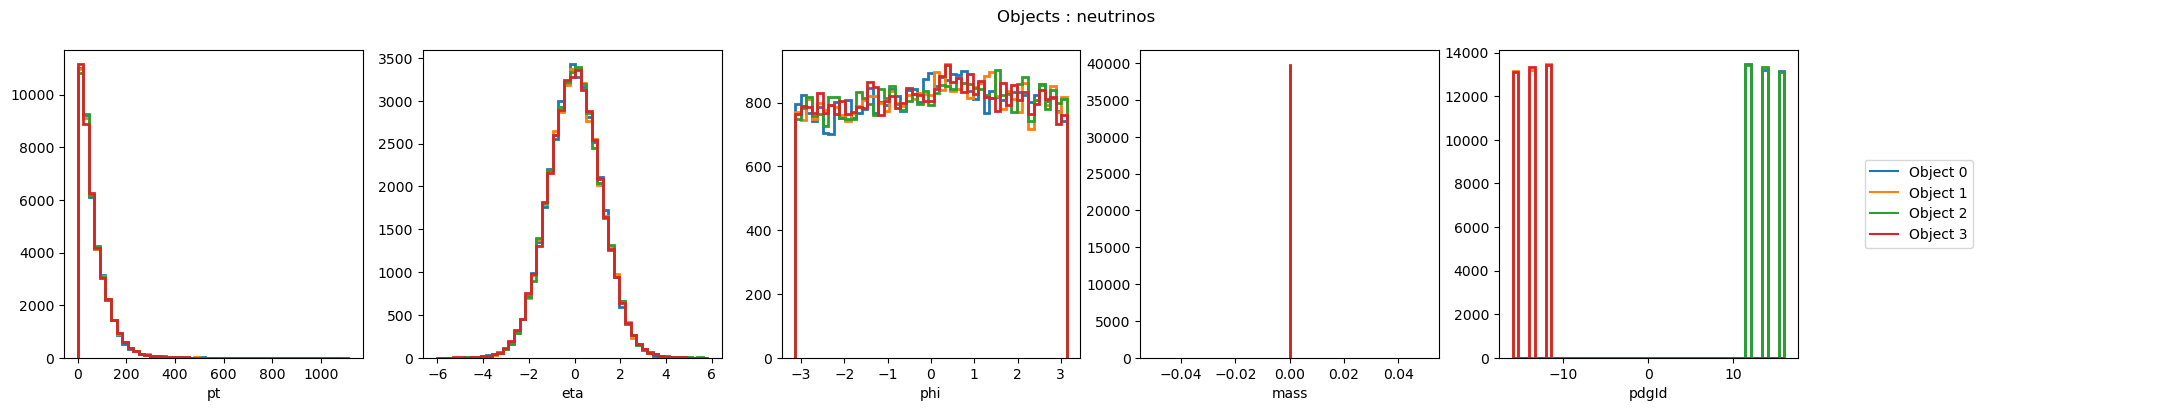

In [44]:
hard_dataset.plot(selection=True,raw=True)

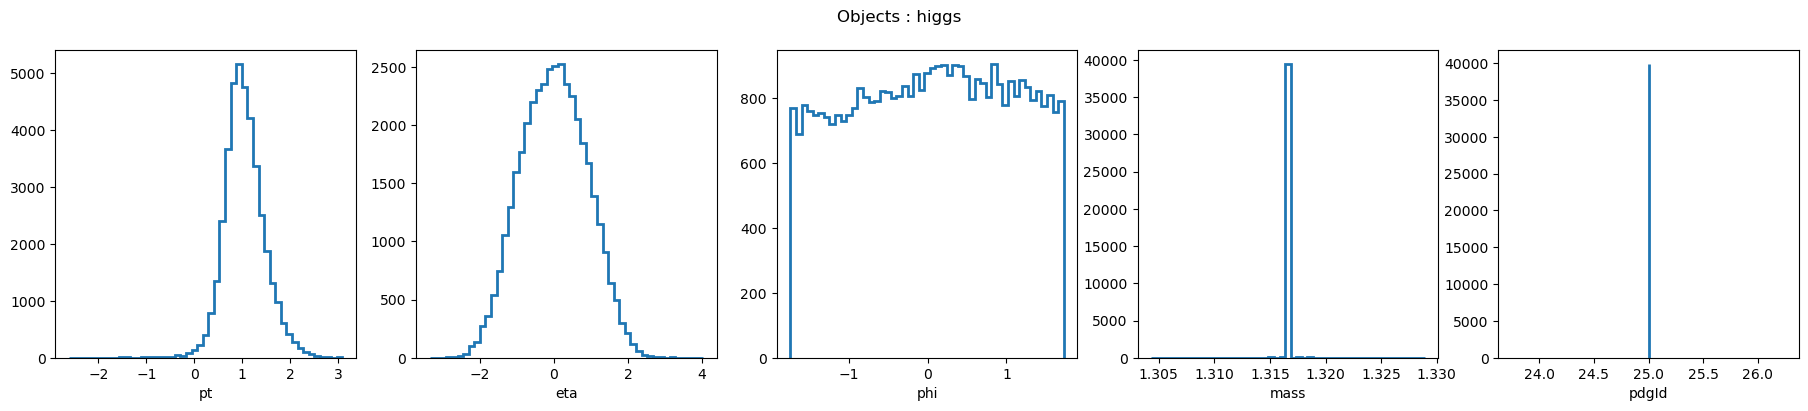

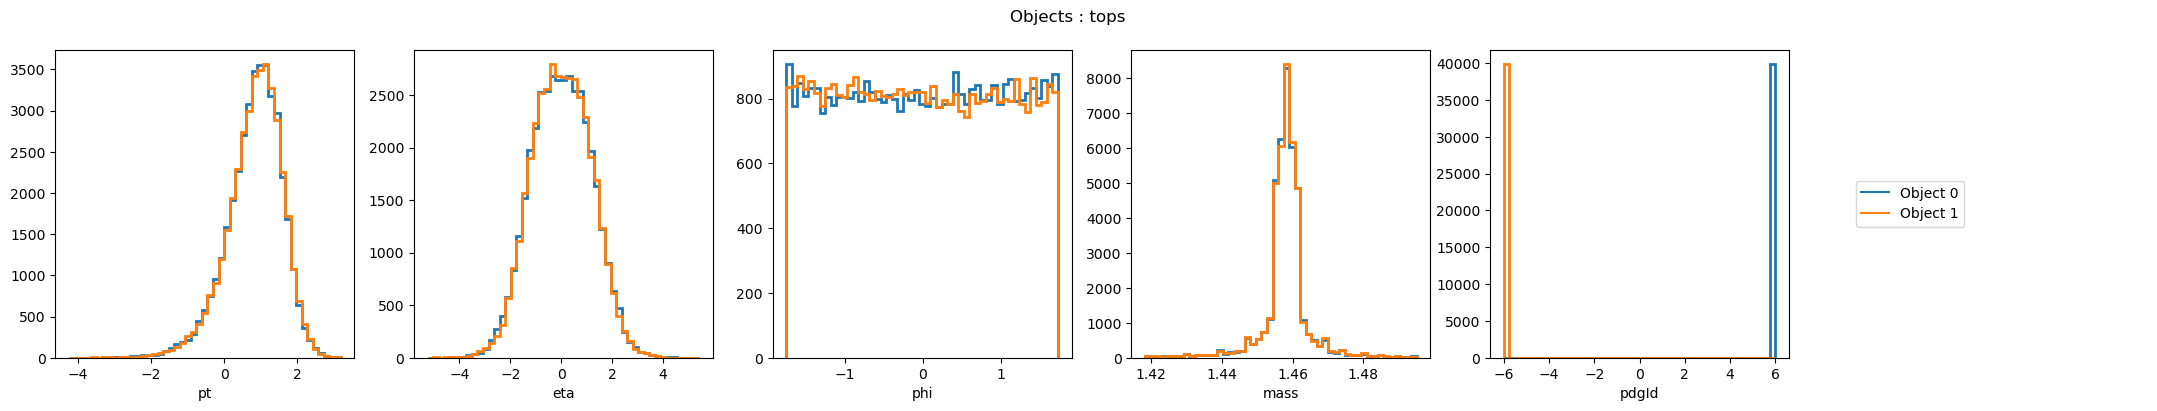

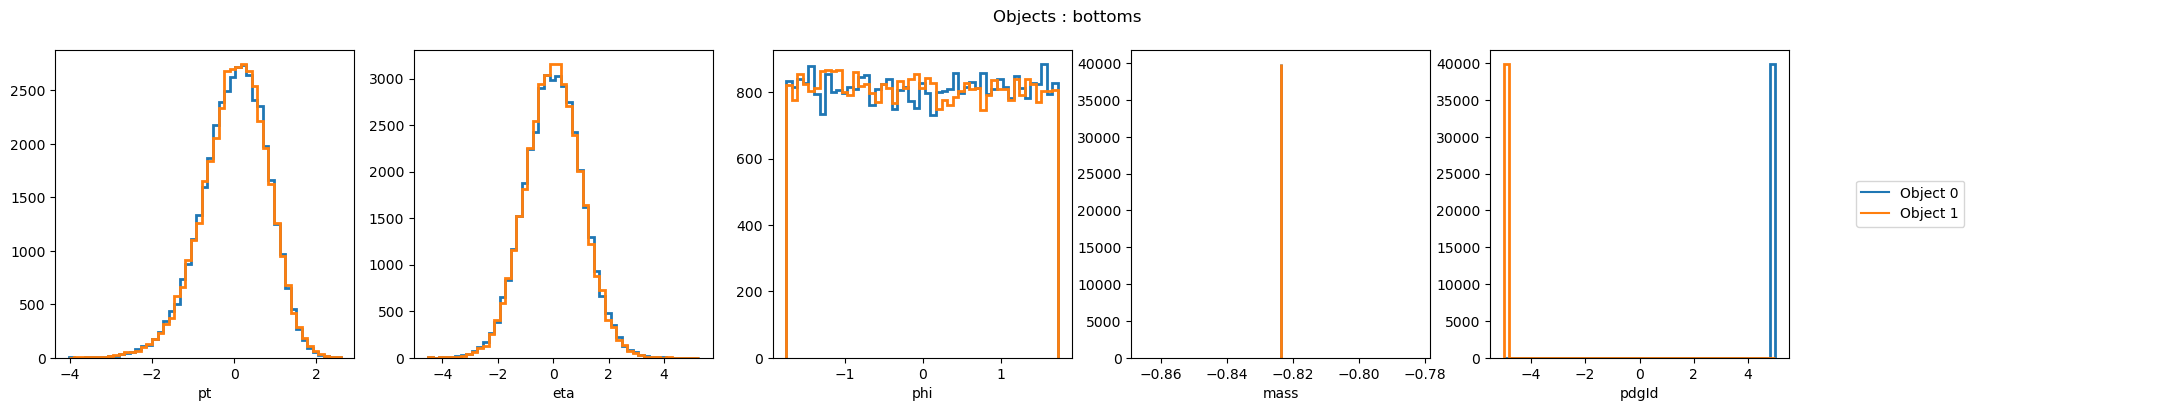

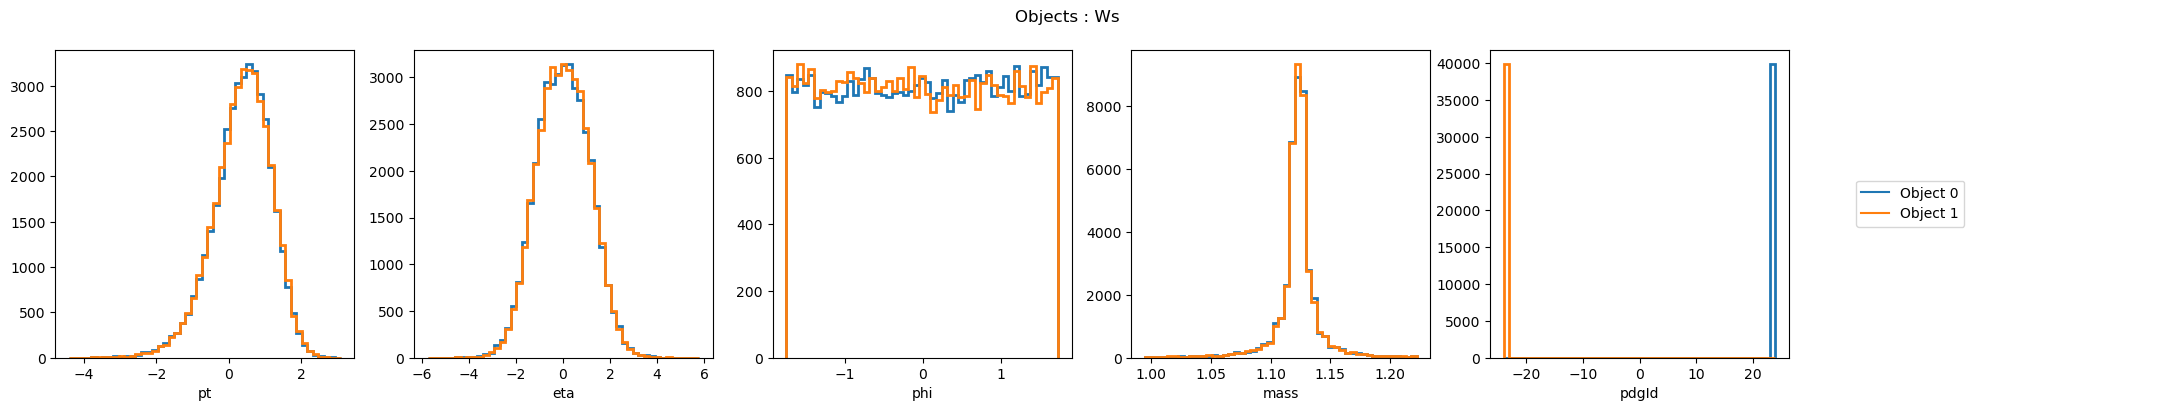

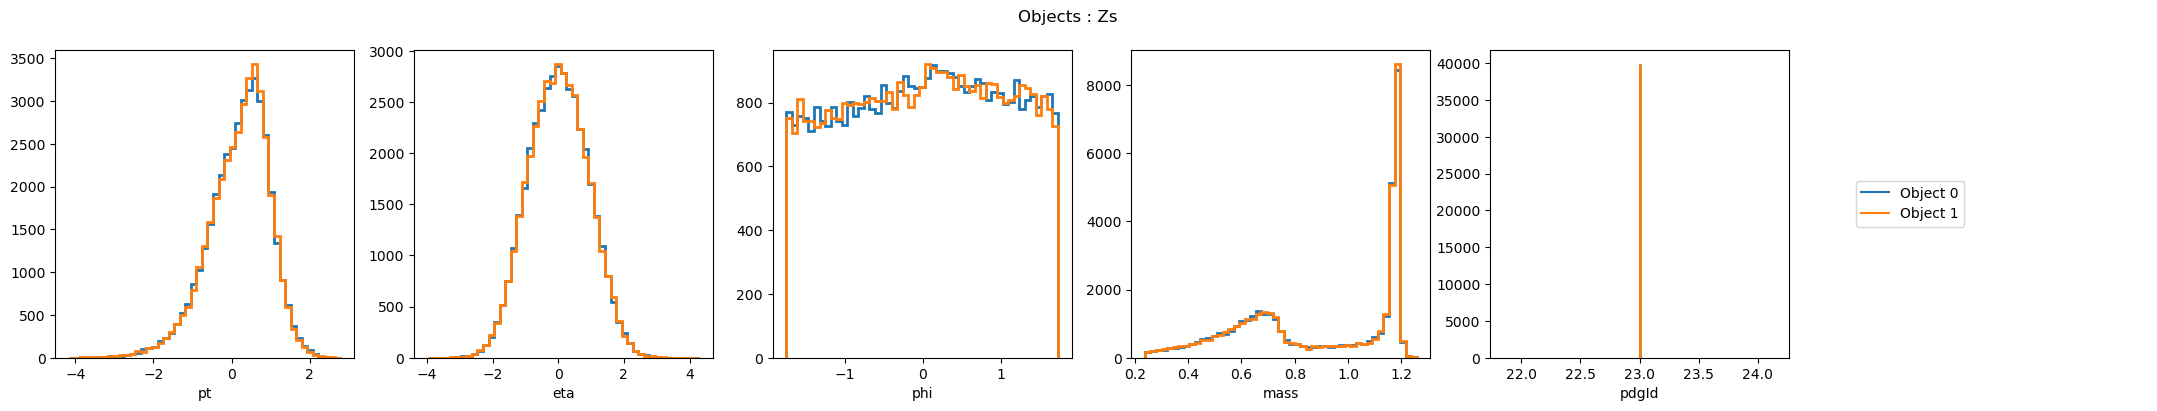

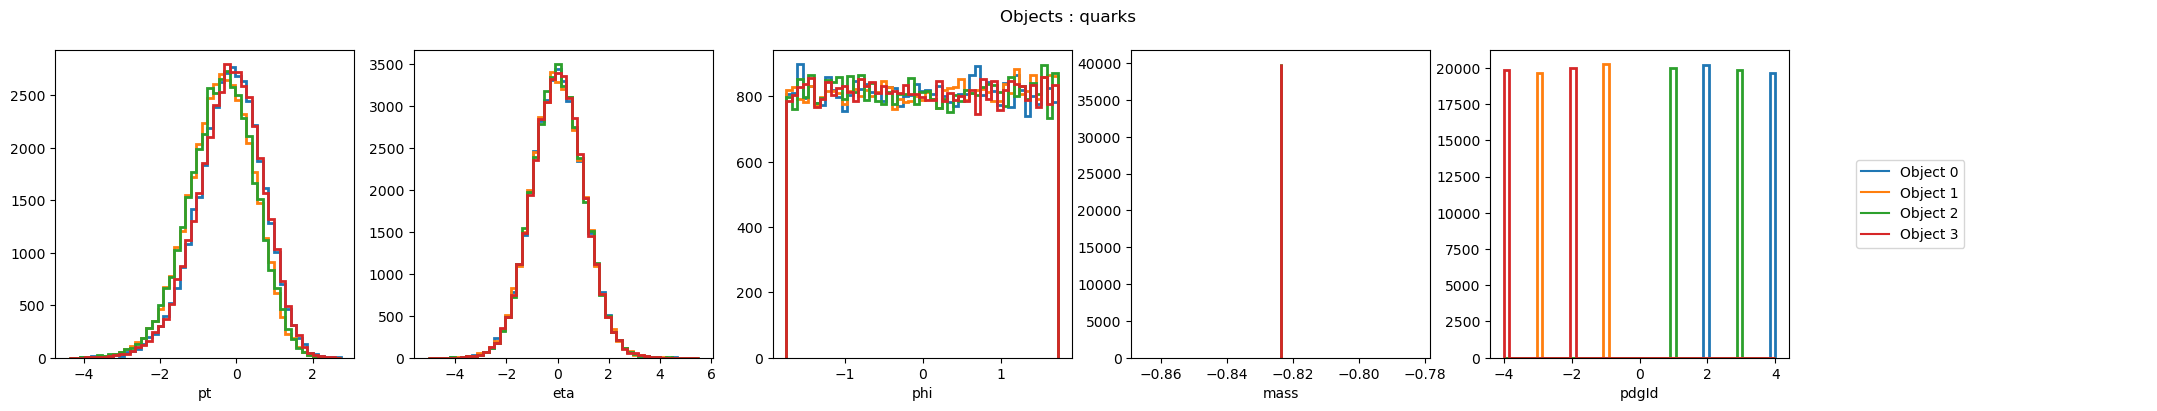

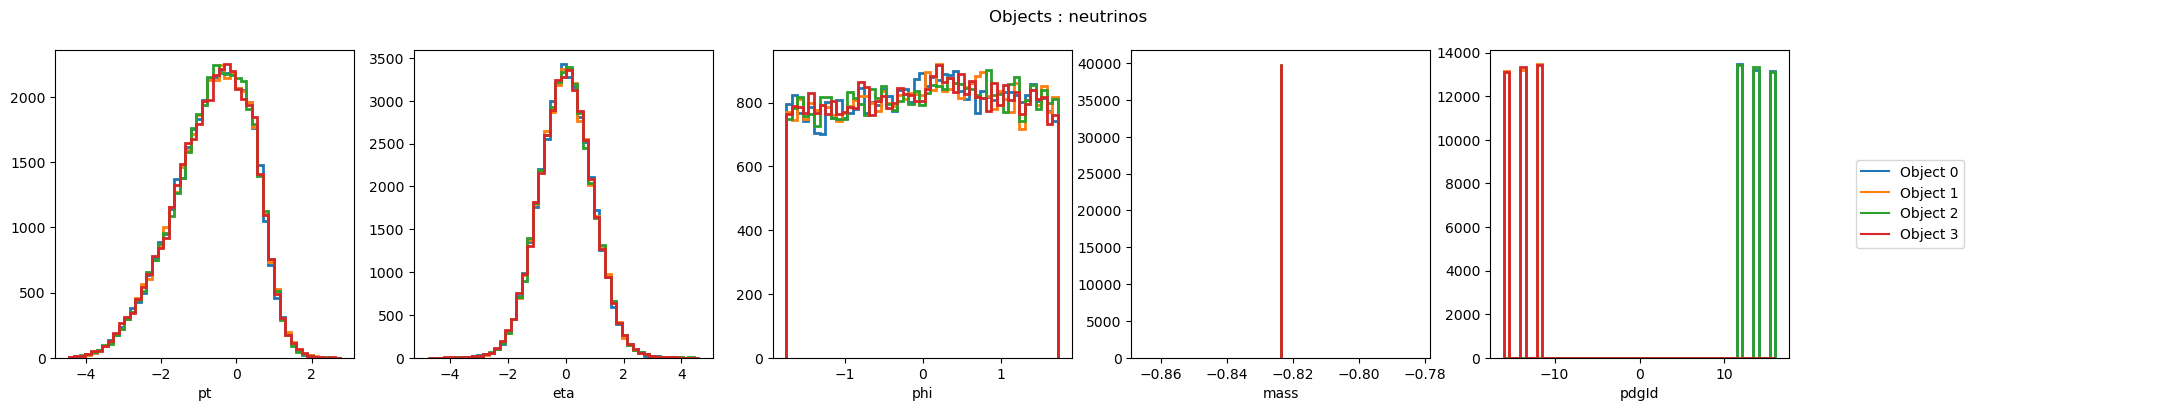

In [45]:
hard_dataset.plot(selection=True,raw=False)

Let us move to Reco now, we will load exactly as before, but a different tree

In [46]:
data_reco = ParquetData(
    files = [
        '/cephfs/dice/users/sa21722/datasets/MEM_data/ttH/TF_v6/reco/2018/ttH/ttH_HToInvisible_M125.parquet',
    ],
    lazy = True,
    N = data_hard.N,
)

print (data_reco)

Data object
Loaded branches:
   ... file: 100000
   ... sample: 100000
   ... tree: 100000
Branch in files not loaded:
   ... Generator_scalePDF
   ... Generator_weight
   ... Generator_x1
   ... Generator_x2
   ... Generator_xpdf1
   ... Generator_xpdf2
   ... InputMet_phi
   ... InputMet_pt
   ... cleanedJet_btagDeepFlavB
   ... cleanedJet_eta
   ... cleanedJet_mass
   ... cleanedJet_phi
   ... cleanedJet_pt
   ... event
   ... ncleanedBJet
   ... ncleanedJet
   ... region
   ... weight_nominal
   ... xs_weight


In [47]:
reco_dataset = ttHRecoDataset(
    data = data_reco,
    selection = [
        'jets',
        'met',
    ],
    build = False,
    fit = True,
    coordinates = 'cylindrical',
    apply_preprocessing = True,
    apply_boost = False,
    dtype = torch.float32,
)
print(reco_dataset)

Before cut 100000
After cut 49446
Saving objects to /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_reco
Saving preprocessing to /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_reco
Will overwrite what is in output directory /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_reco/preprocessing
Preprocessing saved in /cephfs/dice/users/sa21722/projects/MEM/memflow/ttH/ttH_reco/preprocessing
Reco dataset with 49446 events
Containing the following tensors
jets  : data ([49446, 15, 5]), mask ([49446, 15])
        Mask exist    : [100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%, 100.00%]
        Mask attn     : [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
        Weights       : 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00, 49446.00
        Features      : 

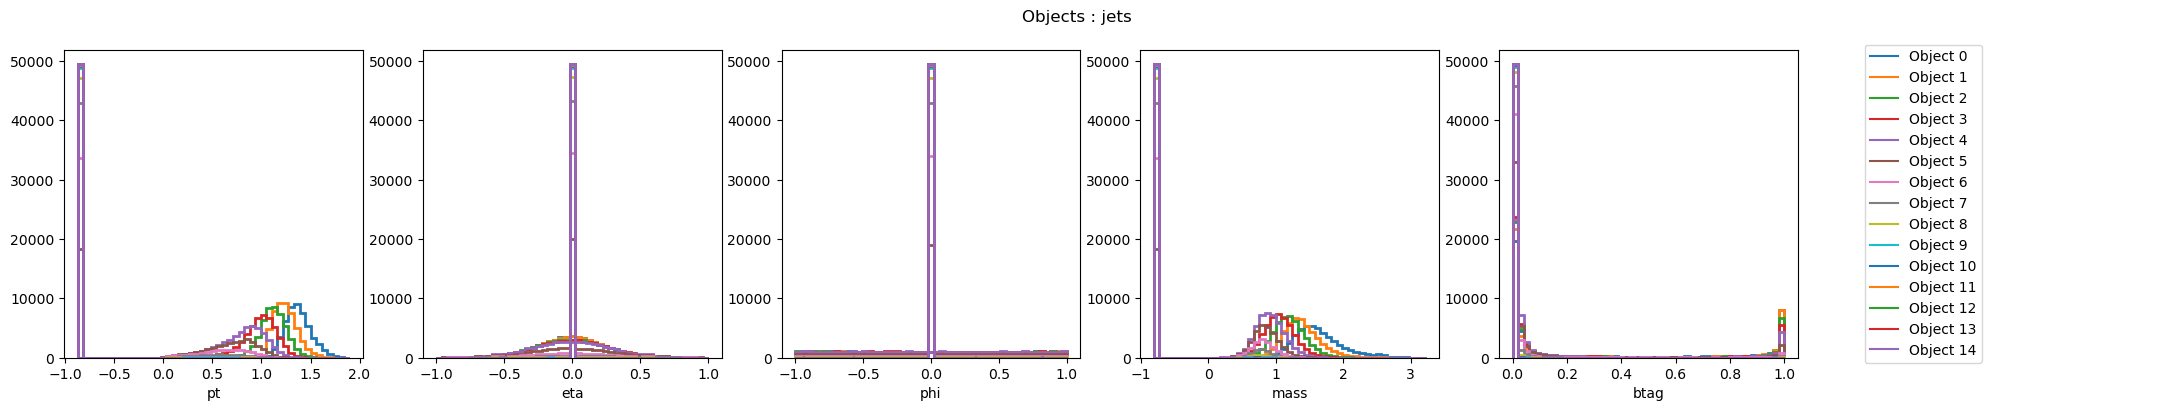

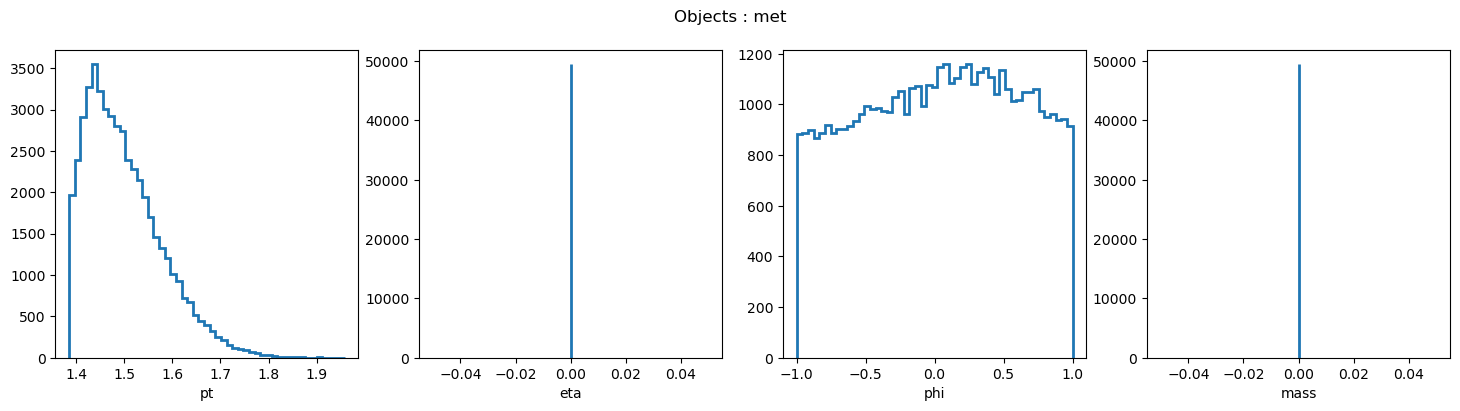

In [48]:
reco_dataset.plot(selection=True,raw=False)